# Introduction

อะไรคือ ปัจจัยที่มีอิธิพล ต่อความรัก ข้อมูลที่เราได้นำมา ได้นำมาจาก <strong>Columbia Business School</strong> รวบรวมโดย <strong>Professors Ray Fisman</strong> และ <strong>Professors Sheena Iyengar</strong> เขาสองคนได้ทำการเก็บข้อมูลโดยการจัดงาน ที่ให้คนได้มีโอกาศเข้ามาทำการรู้จักกัน และเข้าพูดคุยทำความรู้จักกัน โดยการทำกิจกรรมนี้ ก็ได้มีการสัมภาษณ์ ว่าเขามีความสนใจอะไรในคนที่เขามาคุยด้วย หรือไปคุยกะเขา คุยกันเป็นยังไง เป็นต้น ดังนั้นเนื่องจาก เรามีข้อมูล สาเหตุ แรงจูงใจ feature ต่างๆ เราเลยสนใจที่จะวิเคราะห์ว่า อะไรเป็นปัจจัยหลักๆที่ เรารู้สึกหลงรัก หรือชอบอีกฝ่ายได้<br>
`http://www.stat.columbia.edu/~gelman/arm/examples/speed.dating/`


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# ตัวอย่างตาราง
เป็นตัวอย่าง ของข้อมูล 5 อันดับแรก

In [2]:
rawdf = pd.read_csv('../Statistic2/Speed Dating Data2.csv')
rawdf.head(5)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# เลือก column ที่สนใจ แล้วนำมาหา mean แล้ว แยก ชายหญิง จาก นั้น normalize ข้อมูล
def GroupForPresent(lst):
    test = rawdf[lst]
    test = test.fillna(0)
    test['total'] = test.iloc[:, 1:].values.sum(axis=1)
    test = test[test['total'] != 0]
    
    test['gender'] = test['gender'].apply(round)
    test['gender'].value_counts()
    
    for v in lst[1:]:
        test[v] = test[v]/test['total']*100
    tmp = test.groupby('gender').agg({feature: 'mean' for feature in lst})
    tmp = tmp.drop('gender', axis=1)
    tmp = tmp.sort_index(ascending=False)
    return tmp

In [4]:
feature = ['gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1']
tmp = GroupForPresent(feature)

In [19]:
# ทำให้ใช้ ภาษาไทยได้
import matplotlib as mpl
import matplotlib.font_manager as font_manager

path = '/Users/nutorbit/Downloads/upcjl.ttf'
fp = mpl.font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = fp.get_name()
mpl.rcParams.update({'font.size': 30})

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns


# ช่วงอายุของกลุ่มตัวอย่าง
นี้คือกราฟ แสดงความถี่ของช่วงอายุของผู้เข้าร่วมกิจกรรม จะเห็นได้ว่ากลุ่มตัวอย่างของเราส่วนมากอยู่ในช่วงอายุ 20 - 30 ปี เป็นส่วนมาก

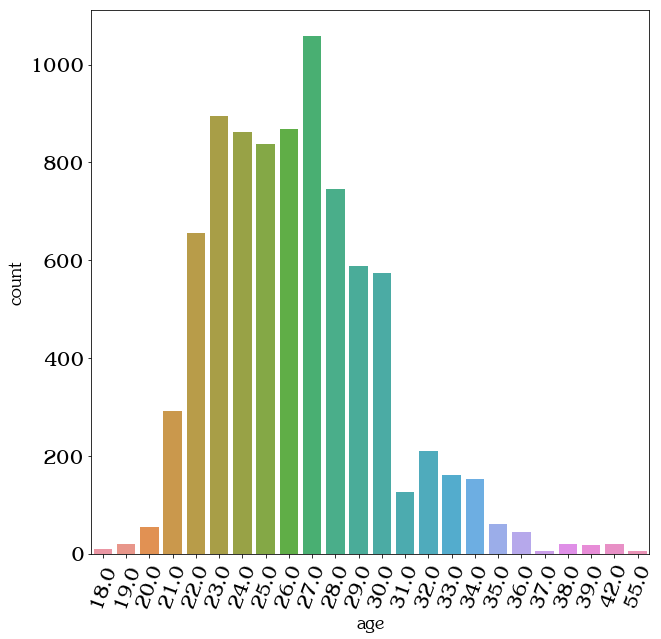

In [21]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'age', data=rawdf)
plt.xticks(rotation=70)
plt.show()

# plt.bar(np.arange(len(rawdf.loc[:, 'age'])), rawdf.loc[:, 'age'])
# plt.show()

# สัญชาติ
นี้คือกราฟ แสดงความถี่ของ คนแต่ละสัญชาติที่ได้มาร่วมกิจกรรม และทำให้เราเห็นได้ชัดว่า เป็นชาวยุโรป เป็นกลุ่มหลักที่เข้าร่วมกิจกรรม


In [22]:
# list(rawdf.columns)

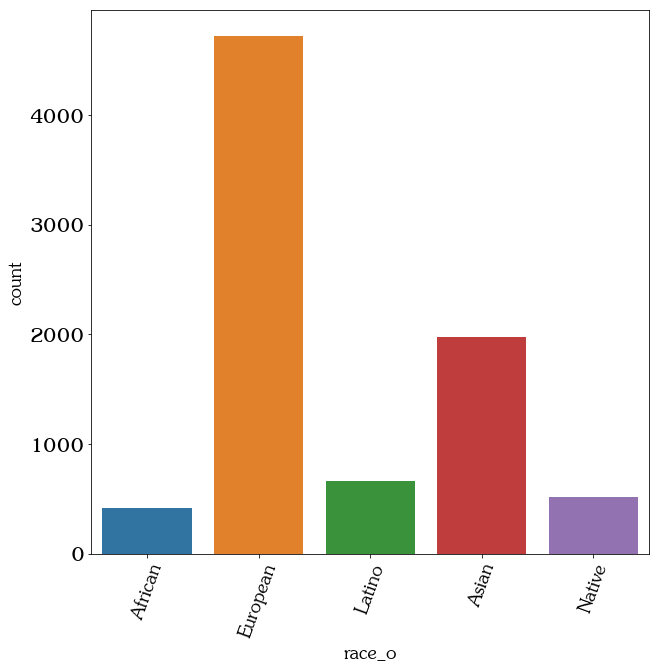

In [23]:
plt.figure(figsize=(10, 10))
sns.countplot(x = 'race_o', data=rawdf)
x = [0, 1, 2, 3, 4]
labels = ['African', 'European', 'Latino', 'Asian', 'Native']
plt.xticks(x, labels, rotation=70)
plt.show()

# สิ่งที่สนใจ
จากกราฟข้างล่าง จะแสดงค่าเฉลี่ยของ สิ่งที่คนสนใจหรือมองหา


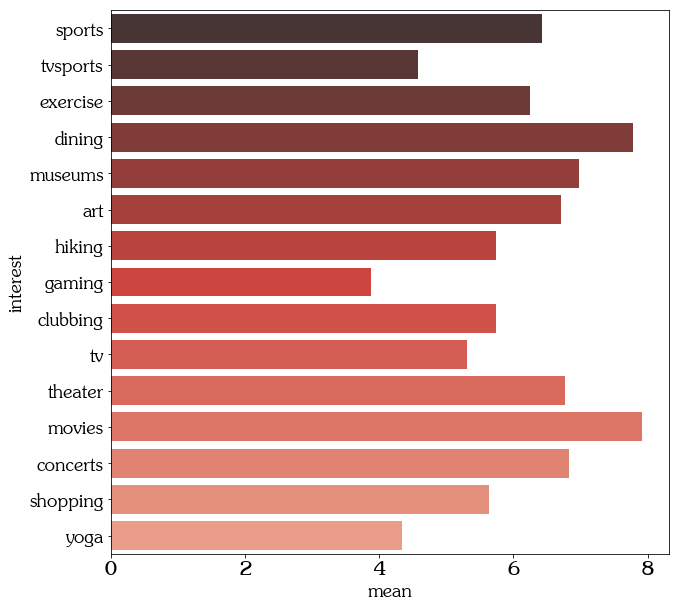

In [24]:
lst = ['sports','tvsports','exercise','dining','museums','art','hiking','gaming','clubbing','tv','theater','movies','concerts','shopping','yoga']
'''
tmp = pd.DataFrame()
for x in lst:
    tmp[x] = pd.Series(rawdf[x].mean())
'''
'''
tmp = []
for x in lst:
    tmp.append(rawdf[x].mean())
x = lst
'''
tmp = []
for x in lst:
    tmp.append(rawdf[x].mean())
new = pd.DataFrame({'interest': pd.Series(lst), 'mean': pd.Series(tmp)})

# print(tmp)
plt.figure(figsize=(10, 10))
sns.barplot(x="mean", y="interest", data=new, palette="Reds_d")
plt.show()

In [25]:
'''
sns.countplot(x='goal', data=rawdf)
plt.show()
'''

"\nsns.countplot(x='goal', data=rawdf)\nplt.show()\n"

In [26]:
def _scale_data(data, ranges):
    (x1, x2), d = ranges[0], data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

# reference radar chart: http://datascience.stackexchange.com/questions/6084/how-do-i-create-a-complex-radar-chart

class RaderChart():
    def __init__(self, fig, variables, ranges, n_ordinate_levels = 6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.8,0.8],polar = True, label = "axes{}".format(i)) for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels = ['มีเสน่ห์', 'จริงใจ', 'มีความรู้', 'สนุกสนาน', 'ทะเยอทะยาน'])
        
        for txt, angle in zip(text, angles):
            txt.set_rotation(angle - 90)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num = n_ordinate_levels)
            grid_label = [""]+[str(int(x)) for x in grid[1:]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]

    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)

def plotRadar(tmp, name, header):
    fig = plt.figure(figsize=(10, 10))
    datas = tmp[name].values 
    ranges = [[2**-20, 36] for attr in name]
    radar = RaderChart(fig, name, ranges)

    for data, co, lab in zip(datas, ['blue', 'red'], ['ชาย', 'หญิง']):
        radar.plot(data, color = co, label = lab)
        radar.fill(data, alpha = 0.1, color = co)
    radar.legend(loc = 1, fontsize = 20)
    # plt.title(header, y=1.08)
    plt.show()

# อะไรคือปัจจัยในการเข้าหาเพศตรงข้าม

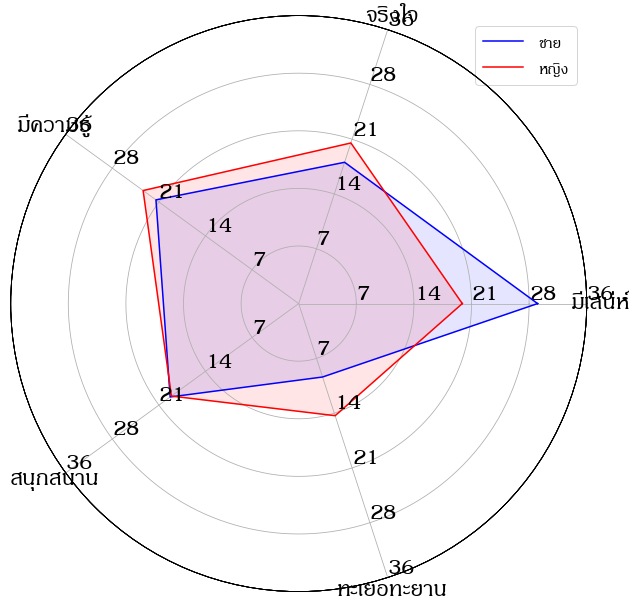

In [27]:
feature = ['gender', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1']
tmp = GroupForPresent(feature)

feature = feature[1:]
plotRadar(tmp, feature, 'การตัดสินใจในการเลือกเพศตรงข้าม')

### ข้อสรุป
* สำหรับเพศชายจะพิจารณาเพศตรงข้ามที่ดูมีเสน่ห์เป็นปัจจัยหลักในการจัดสินใจ
* สำหรับเพศหญิงจากกราฟจะเห็นได้ว่าค่อนข้างอยูในกลุ่มไล่ๆกัน แต่จะหนักไปทางด้านคนที่ดูมีความรู้

สามาถสรุปได้ว่า ผู้ชายโดนเฉลี่ยแล้วพิจารณาผู้หญิงที่ดูมีเสน่ห์เป็นส่วนมาก แต่สำหรับผู้หญิงแล้ว ค่อนข้างจะไม่หนักไปด้านใดด้านหนึ่งมากเกินไป

# ความคิดเพศเดียวกันเวลาเห็นเขาไปจีบเพศตรงข้ามเขากำลังมองหาคนแบบไหน

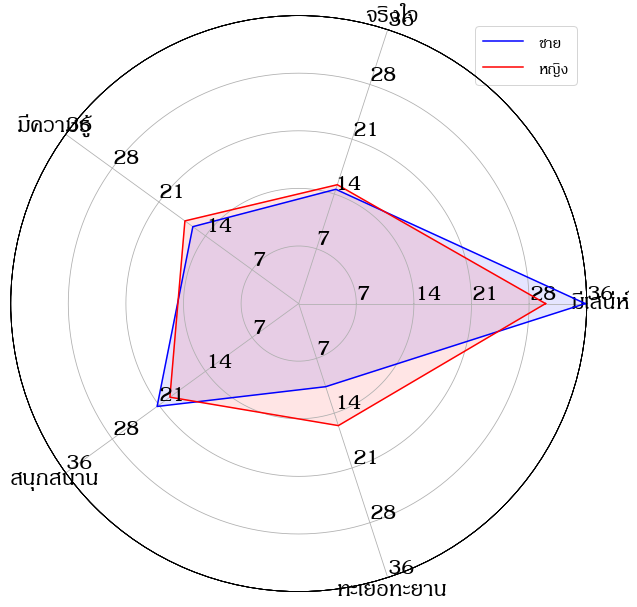

In [28]:
feature = ['gender', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1']
tmp = GroupForPresent(feature)

feature = feature[1:]
# print(tmp)
plotRadar(tmp, feature, 'มองว่าเพศเดียวกันเลือกคนแบบไหน')

### ข้อสรุป
* สำหรับเพศชายเวลามองว่าเพศเดียวกันคิดอะไร จะมองว่าผู้ชายคนนั้นเลือกคนที่ดูมีเสน่ห์
* สำหรับเพศหญิงก็จะทำนองเดียวกันกับผู้ชาย

สามารถสรุปได้ว่า ไม่ว่าจะเป็นเพศไหน เราก็มักคิดว่า คนเพศเดียวกันจะเลือกพิจารณาคนที่หน้าตา

# Correlation
เป็นการแสดงผลด้วย กราฟความร้อน(heatmap) โดยแสดงความสัมพันธ์ของความสัมพันธ์ที่เราสนใจ โดยที่เราสนใจคือ ปัจจัยหลักๆในการตัดสินใจเลือกฝ่ายตรงข้าม โดย feature คู่ใดๆ มี correlation เข้าใกล้ 1 มากๆ แสดงว่ามีความสัมพันธ์ทางบวก ส่วน ถ้าเข้าใกล้ -1 แสดงว่ามีความสัมพันธ์ด้านลบ แต่ถ้าเป็น 0 แปลว่าไม่มีความสัมพันธ์

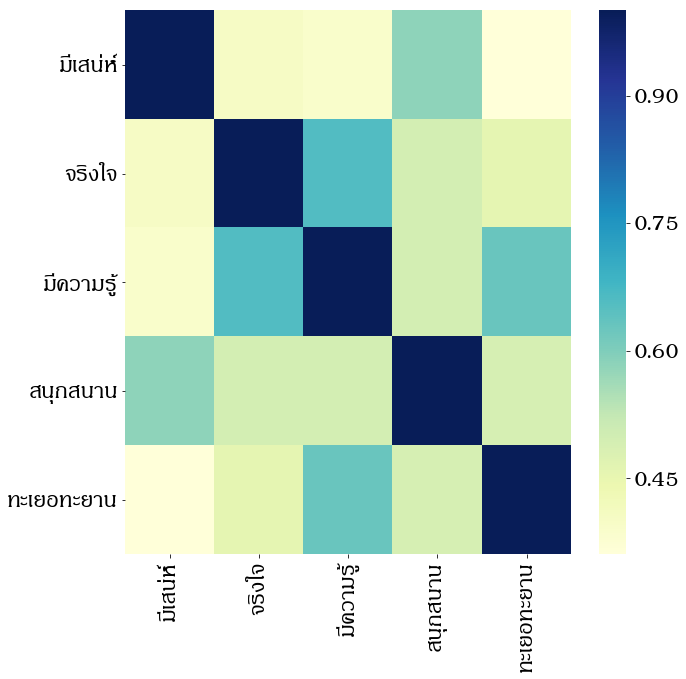

In [29]:
# print(np.corrcoef(test['dec'], test['attr']))
# print(np.correlate(test['dec'], test['attr']))
# np.corrcoef(test)
plt.figure(figsize=(10, 10))
sns.heatmap(rawdf[['attr', 'sinc', 'intel', 'fun', 'amb']].dropna().corr(),\
            xticklabels=['มีเสน่ห์', 'จริงใจ', 'มีความรู้', 'สนุกสนาน', 'ทะเยอทะยาน'],\
            yticklabels=['มีเสน่ห์', 'จริงใจ', 'มีความรู้', 'สนุกสนาน', 'ทะเยอทะยาน'], cmap="YlGnBu")
plt.show()

เราจะเห็นได้ว่า ตัวมันเองจะมากที่สุดเสมอ และเราจะเห็นได้ว่า ความรู้ กับ จริงใจ มี correlation สูงที่สุด ทำให้เราสามารถสรุปคร่าวๆได้ว่า 2 feature นี้มีความสัมพันธ์กันพอสมควร และจะส่งผลต่อการตัดสินใจ

In [30]:
feature = ['id', 'gender', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb']
test = rawdf[feature]
test = test.groupby(['id', 'gender']).agg({v: 'mean' for v in feature})
for v in ['dec', 'attr', 'sinc', 'intel', 'fun', 'amb']:
        test[v] = test[v]/test[v].sum(axis=0)*10
# test.head(10)

# แนวโนมการตัดสินใจ

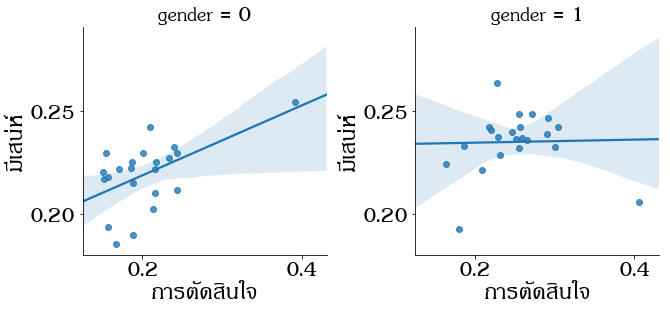

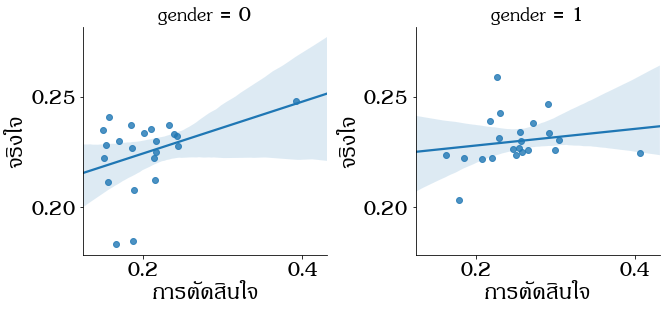

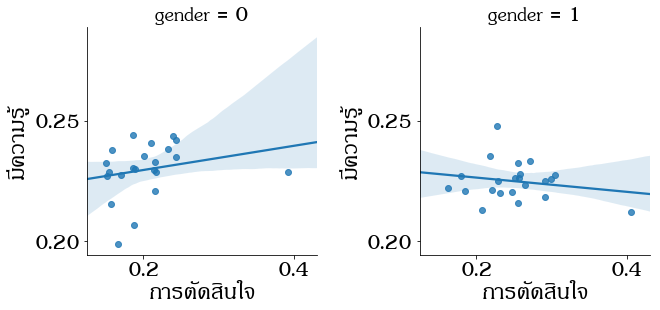

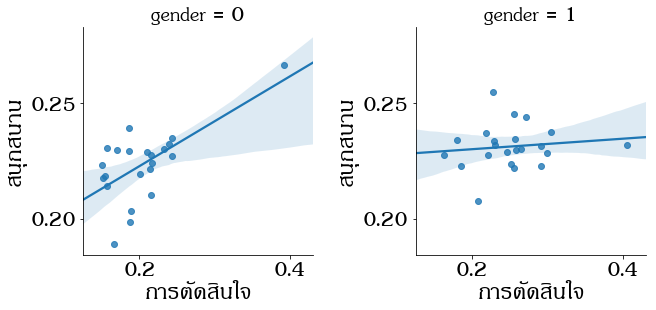

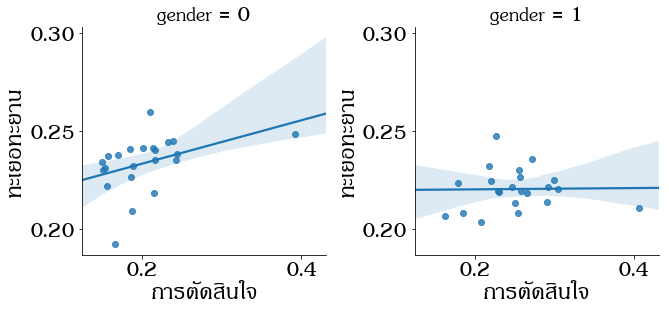

In [31]:
# มีเสน่ห์
ax = sns.lmplot(x="dec", y="attr", data=test, col='gender')
ax.set(xlabel='การตัดสินใจ', ylabel='มีเสน่ห์')
plt.show()

# จริงใจ
ax = sns.lmplot(x="dec", y="sinc", data=test, col='gender')
ax.set(xlabel='การตัดสินใจ', ylabel='จริงใจ')
plt.show()

# มีความรู้
ax = sns.lmplot(x="dec", y="intel", data=test, col='gender')
ax.set(xlabel='การตัดสินใจ', ylabel='มีความรู้')
plt.show()

# สนุกสนาน
ax = sns.lmplot(x="dec", y="fun", data=test, col='gender')
ax.set(xlabel='การตัดสินใจ', ylabel='สนุกสนาน')
plt.show()

# ทะเยอทะยาน
ax = sns.lmplot(x="dec", y="amb", data=test, col='gender')
ax.set(xlabel='การตัดสินใจ', ylabel='ทะเยอทะยาน')
plt.show()